# T1 Q3

---

In [729]:
import math
import csv
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [730]:
import warnings
warnings.filterwarnings("ignore")

## Q1

---

In [843]:
K_true = 10
def generate_aj (K_true):
    a_j = []
    for i in range(0, K_true+1):
        a_j.append(rand.uniform(-1,1))
    return a_j
a_j = generate_aj (K_true)

In [844]:
N = 20
def generate_data (N):
    data = []
    for j in range(0, N):
        data.append(rand.uniform(-5,5))
    return data
data = generate_data(N)

In [845]:
def poly (data, a_j):
    poly_output = []
    for x in data: 
        total_sum = 0
        for j in range(len(a_j)):
            total_sum += a_j[j]*(x**j)
        poly_output.append(total_sum)
    return poly_output
poly_rand_output = poly (data, a_j)

In [846]:
def compute_y (data, a_j):  
    y_i_prior = poly (data, a_j)
    eps_lst = []
    for i in range(len(data)):
        eps_lst.append(np.random.normal(0, np.sqrt((max(y_i_prior) - min(y_i_prior))/10.)))
    y_i = np.add(y_i_prior, eps_lst)
    return y_i
y_i = compute_y (data, a_j)

In [866]:
def a_vector_lst (data, y_i, k_high):
    return (np.polyfit(data, y_i, k_high, full=True))
a_lst, _, _, chi, _ = a_vector_lst(data, y_i, K_true)
poly_output = poly (data, a_lst[::-1])

## Q2

---

In [872]:
sigma = (max(poly_output) - min(poly_output)) / 10.0
print sigma

648821.634502


In [873]:
def chi_square (X, Y):
    return np.sum((np.array(Y) - np.array(X)) ** 2) / sigma
chi_square(poly_output, y_i)

7.2437371528419074

In [874]:
def min_chi (y_i, k_high):
    a_lst, residuals, _, _, _ = a_vector_lst(data, y_i, k_high)
    poly_output = poly (data, a_lst[::-1])
    min_chi_val = chi_square (poly_output, y_i)
    return min_chi_val
min_val = min_chi(y_i, K_true)
print K_true, min_val

10 7.24373715284


1 140373854.437
2 36967724.3074
3 32725196.832
4 3763300.75677
5 3695691.75775
6 238239.028691
7 187716.087412
8 1169.25943472
9 1109.42343619
10 5.81874713188
11 5.8176046397
12 4.83870575915
13 2.09206941646
14 2.04313454588
15 2.04260821657
16 1.79316277117
17 0.0634794264921
18 0.0353609754765
19 1.56436978986e-17


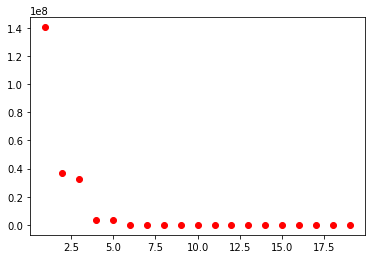

In [878]:
N = 20
data = generate_data(N)
a_j = generate_aj (K_true)
y_i = compute_y (data, a_j)
a_lst, _, _, chi, _ = a_vector_lst(data, y_i, K_true)
poly_output = poly (data, a_lst[::-1])
sigma = (max(poly_output) - min(poly_output)) / 10.0
chi_lst = []
for k in range(1, 20):
    chi_lst.append(min_chi (y_i, k))
    print k, min_chi (y_i, k)
plt.plot(range(1,20), chi_lst, 'ro')
plt.show()

## Q3

---

In [856]:
N = 20
total_bic_lst = []
for i in range(500):
    data = generate_data(N)
    a_j = generate_aj (K_true)
    y_i = compute_y (data, a_j)
    a_lst, residuals, _, _, _ = a_vector_lst(data, y_i, K_true)
    poly_output = poly (data, a_lst[::-1])
    sigma = (max(poly_output) - min(poly_output)) / 10.0
    bic_val_lst = []
    for k_high in range(1, 20):
        min_val = min_chi(y_i, k_high)
        bic_val = N/2.*math.log(2*math.pi*sigma) - N * math.e + 1./2.*min_val + k_high/2.*math.log(N)
        bic_val_lst.append(bic_val)
    total_bic_lst.append(np.argmin(bic_val_lst)+1)
print np.mean(total_bic_lst), np.std(total_bic_lst)

10.11 0.849646985518


### Q4

---

In [938]:
N = 3*np.logspace(0,3,40)
n_behavior = []
for num_n in N:
    total_bic_lst = []
    for i in range(5):
        data = generate_data(int(num_n))
        a_j = generate_aj (K_true)
        y_i = compute_y (data, a_j)
        a_lst, _, _, _, _ = a_vector_lst(data, y_i, K_true)
        poly_output = poly (data, a_lst[::-1])
        sigma = (max(poly_output) - min(poly_output)) / 10.0
        bic_val_lst = []
        for k_high in range(1, 20):
            min_val = min_chi(y_i, k_high)
            bic_val = num_n/2.*math.log(2*math.pi*sigma) - num_n * math.e + 1./2.*min_val + k_high/2.*math.log(num_n)
            bic_val_lst.append(bic_val)
        total_bic_lst.append(np.argmin(bic_val_lst)+1)
    n_behavior.append([np.mean(total_bic_lst), np.std(total_bic_lst)]) 

3.0
3.58132992514
4.27530801091
5.10376283956
6.09275286271
7.27338605125
8.68279837415
10.3653218838
12.3738791487
14.7716478951
17.6340482168
21.0511148601
25.130329202
30.0
35.8132992514
42.7530801091
51.0376283956
60.9275286271
72.7338605125
86.8279837415
103.653218838
123.738791487
147.716478951
176.340482168
210.511148601
251.30329202
300.0
358.132992514
427.530801091
510.376283956
609.275286271
727.338605125
868.279837415
1036.53218838
1237.38791487
1477.16478951
1763.40482168
2105.11148601
2513.0329202
3000.0


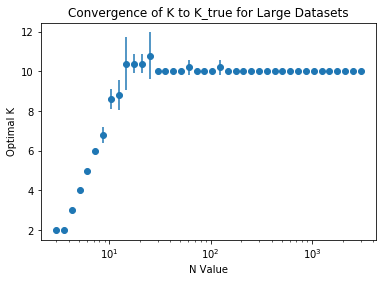

In [947]:
x = 3*np.logspace(0,3,40)
y = [i for [i,j] in n_behavior]
e = [j for [i,j] in n_behavior]

plt.errorbar(x, y, e, linestyle='None', marker='o')
plt.xscale('log')
plt.xlabel('N Value')
plt.ylabel('Optimal K')
plt.title('Convergence of K to K_true for Large Datasets')
plt.show()